In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
# import class from py file
from recursiveLeastSquares import RecursiveLeastSquares

In [2]:
signal = np.loadtxt('timestamp_3.txt')
signal.shape

(4116,)

In [117]:
signal

array([3.70550156e-02, 1.38173103e-01, 2.37054110e-01, ...,
       4.11326905e+02, 4.11427859e+02, 4.11526935e+02])

In [3]:
def differences_of_array(signal):
    '''
    Return a numpy array of the differences in all elements of given array

            Parameters:
                    signal (numpy): array of numbers
                
            Returns:
                    diifs (numpy): list of differences between signal elements. Size: [len(signal)-1, 1]
    '''

    diffs = []
    for i in range(1, signal.size):
        cur = signal[i]
        prev = signal[i-1]
        diff = cur - prev
        diffs.append(diff)

    return np.reshape(np.array(diffs), (-1,1))

def calculate_O_of_k(signal, mean, k, N):
    total = 0
    for i in range(1,N+1):
        total += signal[i] - (signal[0] + (i-1)*mean[k-1])
    
    return (1/N) * total

<div>
<img src="image.png" width="500"/>
</div>


In [110]:
# TODO: add forgetting factor in RLS algorithm

delta = 0.1 # 10ms
A = differences_of_array(signal[0:0])
B = B = np.ones(A.shape)*delta
# make sure numpy data type is float not int
mean = np.array([0.0]*signal.size)
O_acc = np.array([0.0]*signal.size)
O = np.array([0.0]*signal.size)
O_offset = np.array([0.0]*signal.size)
S = np.array([0.0]*signal.size)
error = np.array([0.0]*signal.size)

rcs = RecursiveLeastSquares(A, B)

for k in range(1, signal.shape[0]):
    timestep = signal[k]
    difference = differences_of_array(signal= signal[k:k+2])
    difference = signal[k] - signal[k-1]
    N = difference.size
    
    if N==1: 
        mean[k] = difference
        O[k] = difference 
    else:
        mean[k] = (1/N) * sum(difference) 
        O[k] = calculate_O_of_k(signal, mean, k, N)
    
    O_acc[k] = O_acc[k-1] + abs(O[k])
    error[k] = O_acc[k] - S[k-1]*timestep # error seems to be diverging
    
    S[k] = rcs.addData(error[k].reshape(-1,1), timestep)

    O_offset[k] = S[k]*timestep + error[k]

    # this is a quick fix for the divergence of O_offset as a means to average
    #O_offset[k] = (S[k]*timestep + error[k] + S[k-1]*timestep) / 2
    




C:\Users\Robert\AppData\Local\Temp\ipykernel_16656\4274493163.py:37: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  S[k] = rcs.addData(error[k].reshape(-1,1), timestep)


In [ ]:
# next step is to add an upper and lower bound limits function
Lower_limit = 0
Upper_limit = 0

C:\Users\Robert\AppData\Local\Temp\ipykernel_16656\2142561506.py:16: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


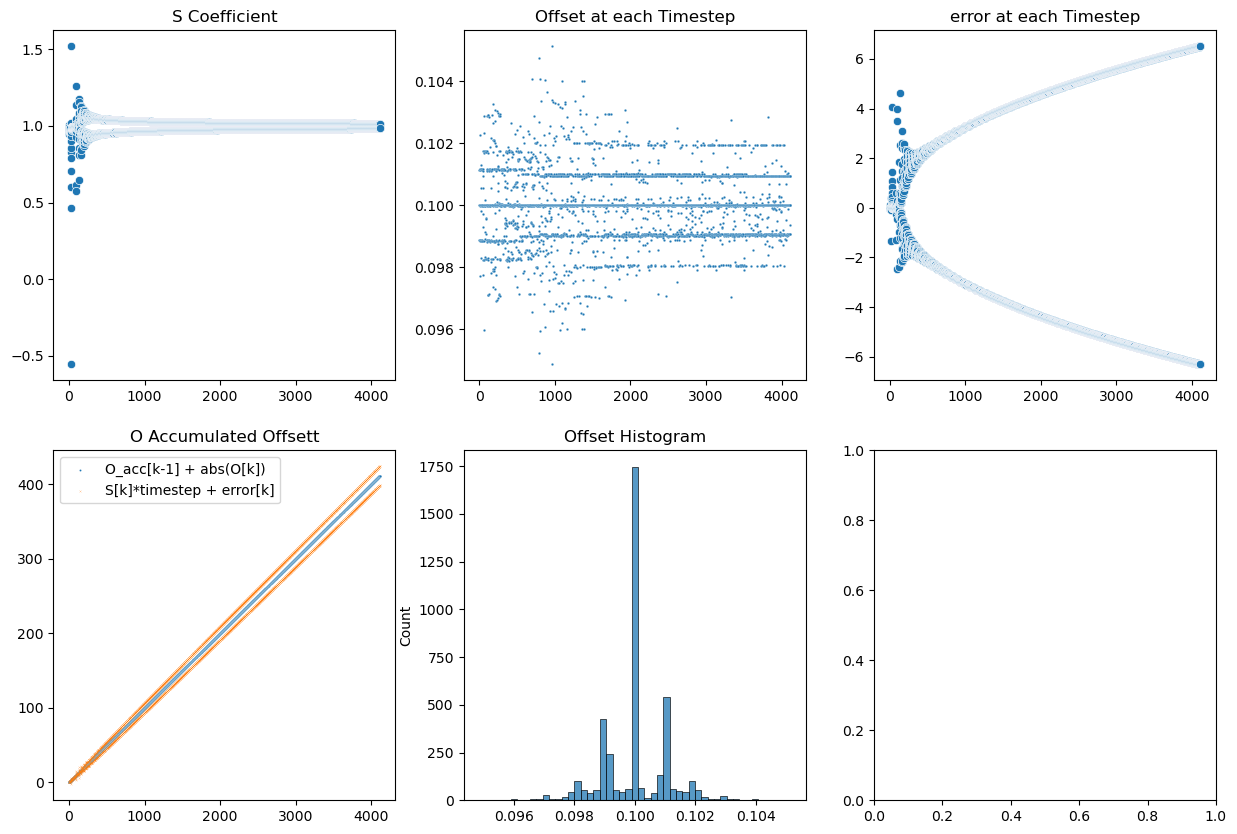

In [115]:
fig, ax = plt.subplots(2, 3, figsize=(15,10)) #, sharex=True)

sns.scatterplot(S[1:], ax=ax[0,0])
ax[0,0].set_title('S Coefficient')

sns.scatterplot(O[1:], ax=ax[0,1], s=3)
ax[0,1].set_title('Offset at each Timestep')

sns.scatterplot(O_acc, ax=ax[1,0], s=2)
ax[1,0].set_title('O Accumulated Offsett')

sns.scatterplot(error, ax=ax[0,2])
ax[0,2].set_title('error at each Timestep')

sns.scatterplot(O_offset, ax=ax[1,0], marker='x', s=2)
ax[1,0].legend(['O_acc[k-1] + abs(O[k])', 'S[k]*timestep + error[k]'])

sns.histplot(O[1:], ax=ax[1,1])
ax[1,1].set_title('Offset Histogram')
fig.show()